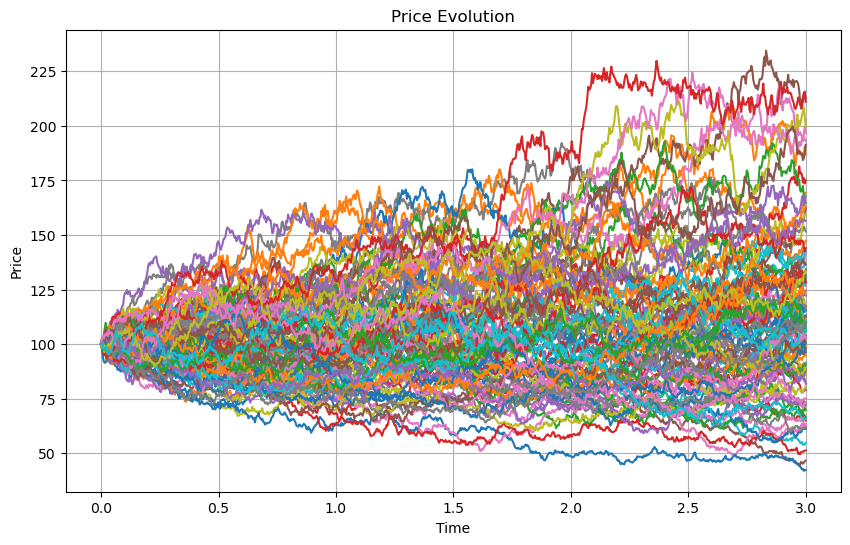

In [9]:
from utils import *



array_of_prices = np.full(100,100) # 100 stock with inital price 100
r = 0.05
volatility = 0.2
T = 3 # 3 Years
dt = 1 / 255 # Assuming 255 trading days
seed = 25 # For reproductibity

dataframe = GBM(array_of_prices, r, volatility, T, dt, seed)

plot_dataframe(dataframe, show_labels=False)



In [22]:
dataframe

,Time,Asset_1,Asset_2,Asset_3,Asset_4,Asset_5,Asset_6,Asset_7,Asset_8,Asset_9,...,Asset_91,Asset_92,Asset_93,Asset_94,Asset_95,Asset_96,Asset_97,Asset_98,Asset_99,Asset_100
0,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,0.003922,100.298108,98.705103,99.693043,98.146648,100.963815,100.387145,100.895420,100.672782,99.660802,...,99.430216,99.403346,98.813335,99.643273,100.663695,102.511854,102.325366,100.692635,98.536101,99.460632
2,0.007843,101.608354,100.753330,101.377990,97.695308,100.721450,100.015501,100.855653,101.034905,98.300796,...,100.074537,100.937935,97.288122,98.712434,101.672472,102.812292,103.560188,98.515545,98.552039,98.576433
3,0.011765,100.557332,101.068237,99.387143,97.256447,99.160449,101.152635,100.048568,101.741536,98.197610,...,101.835416,99.265156,97.497388,99.136675,102.515270,102.056874,102.711551,98.520140,98.269996,97.505592
4,0.015686,99.827274,99.600616,102.476077,98.136053,99.611163,100.291556,100.326019,103.241441,98.110175,...,101.492210,99.108371,97.258635,98.127553,102.908286,102.459057,104.010347,99.177896,99.286533,98.039335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,2.984314,111.302566,162.234697,95.564624,67.914598,99.764876,45.790208,127.879303,141.314362,112.797291,...,98.733809,125.701378,110.725814,208.222724,85.575457,187.024695,71.513845,105.868809,129.485878,66.105146
762,2.988235,111.993582,164.291704,97.674070,67.407958,100.188493,45.282054,128.161501,142.737264,111.460365,...,100.297301,126.710584,110.933336,213.386431,84.633658,184.328002,70.761163,106.621560,128.876362,65.408777
763,2.992157,111.599369,163.956466,96.927665,65.651365,101.201488,45.721517,129.298511,142.430992,109.221238,...,98.362240,123.114450,109.695392,214.925648,85.739463,185.099732,71.479192,110.196693,132.342962,66.313221
764,2.996078,110.997625,169.367528,98.127890,65.814542,101.950345,46.459391,127.713720,141.928162,110.792041,...,98.233114,123.762269,108.505442,215.721177,86.795049,187.718099,73.021493,110.427013,132.398631,65.797036


/Users/manu13/Desktop/PHD/DeepHedging/utils.py:74: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = ( np.log(S / K) + (mu + 0.5 * sigma ** 2) * T ) / (sigma * np.sqrt(T))


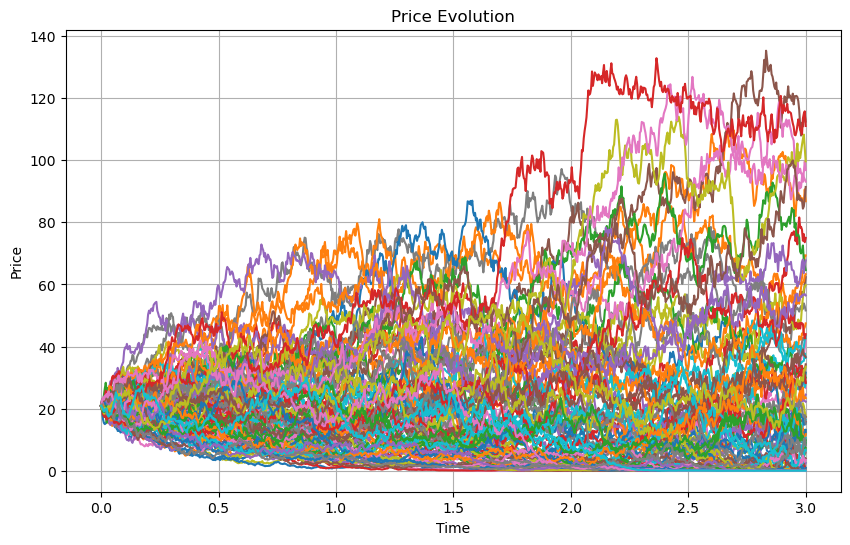

In [10]:
mu = 0.05
volatility = 0.2
T = 3 # 3 Years
dt = 1 / 255 # Assuming 255 trading days
seed = 25 # For reproductibity
K = 100

array_of_prices = np.full(100,100) # 100 stock with inital price 100
r = 0.05
volatility = 0.2
T = 3 # 3 Years
dt = 1 / 255 # Assuming 255 trading days
seed = 25 # For reproductibity

dataframe = GBM(array_of_prices, r, volatility, T, dt, seed)
bsm_prices = bsm_until_maturity(dataframe, K, mu, volatility, T, is_call = True)
plot_dataframe(bsm_prices, show_labels=False)



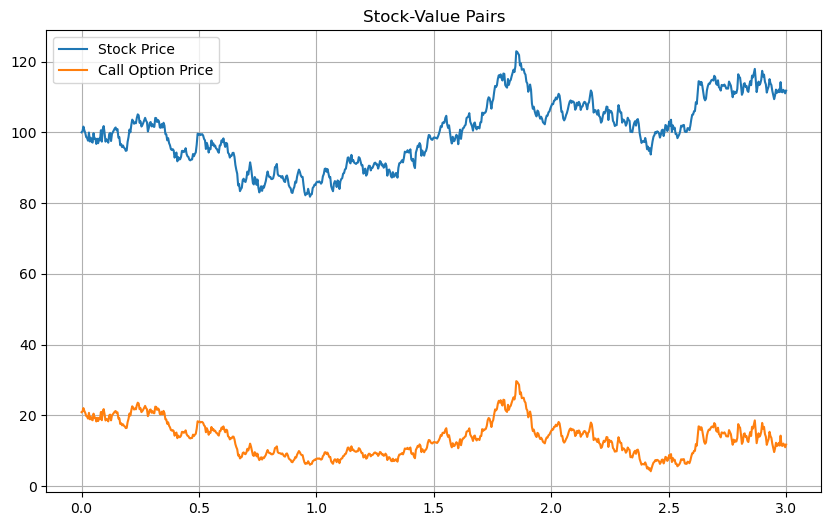

In [11]:
for i in range(1, 2):
    plt.figure(figsize=(10, 6))  # Use `figsize` instead of `size`
    plt.title("Stock-Value Pairs")
    plt.plot(dataframe["Time"], dataframe[f"Asset_{i}"], label="Stock Price")
    plt.plot(dataframe["Time"], bsm_prices[f"Asset_{i}"], label="Call Option Price")
    plt.grid(True)
    plt.legend()
    plt.show()

    
    

/Users/manu13/Desktop/PHD/DeepHedging/utils.py:74: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = ( np.log(S / K) + (mu + 0.5 * sigma ** 2) * T ) / (sigma * np.sqrt(T))


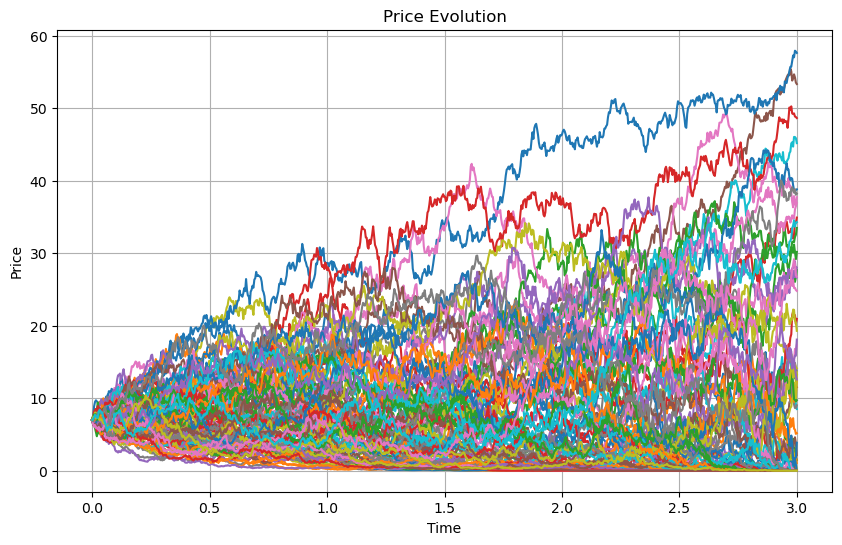

In [12]:
# Repeat the same for puts

dataframe_2 = GBM(array_of_prices, r, volatility, T, dt, seed)
bsm_prices_2 = bsm_until_maturity(dataframe_2, K, mu, volatility, T, is_call = False) # Set false for puts
plot_dataframe(bsm_prices_2, show_labels=False)

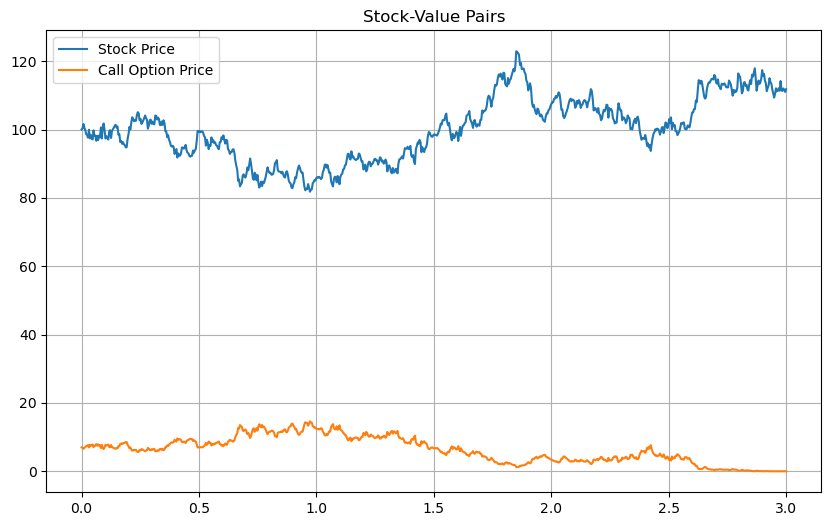

In [13]:
for i in range(1, 2):
    plt.figure(figsize=(10, 6))  # Use `figsize` instead of `size`
    plt.title("Stock-Value Pairs")
    plt.plot(dataframe_2["Time"], dataframe_2[f"Asset_{i}"], label="Stock Price")
    plt.plot(dataframe_2["Time"], bsm_prices_2[f"Asset_{i}"], label="Call Option Price")
    plt.grid(True)
    plt.legend()
    plt.show()

In [17]:
def bs_delta(S, K, T, r, sigma, is_call = True):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1) - (not is_call) # Formula for put is N(d1) - 1
    return delta

In [37]:
def delta_until_maturity(dataframe, K, mu, sigma, T, is_call=True):
    
    deltas = []
    
    # Loop over the rows of the dataframe and compute the delta for all assets
    for i, row in dataframe.iterrows():
        t = T - row["Time"]  # Time until maturity
        prices = row[1:].values  # Ignore time column
        
        # Call black_scholes_price for each price in the row
        delta = [bs_delta(price, K, t, mu, sigma, is_call) for price in prices]
        deltas.append(delta)

    # Convert the list of deltas to a DataFrame
    deltas_array = np.array(deltas)
    df = pd.DataFrame(deltas_array, columns=[f"Delta_Asset_{i+1}" for i in range(len(dataframe.columns) - 1)])
    
    # Add the "Time" column back to the DataFrame
    df.insert(0, "Time", dataframe["Time"])

    return df

In [57]:
deltas = delta_until_maturity(dataframe, K, mu, volatility, T, is_call=True) # False for puts
deltas

/var/folders/j0/tqzlnmks6cx221q8pl95104w0000gn/T/ipykernel_24982/208936040.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


,Time,Delta_Asset_1,Delta_Asset_2,Delta_Asset_3,Delta_Asset_4,Delta_Asset_5,Delta_Asset_6,Delta_Asset_7,Delta_Asset_8,Delta_Asset_9,...,Delta_Asset_91,Delta_Asset_92,Delta_Asset_93,Delta_Asset_94,Delta_Asset_95,Delta_Asset_96,Delta_Asset_97,Delta_Asset_98,Delta_Asset_99,Delta_Asset_100
0,0.000000,0.727815,0.727815,0.727815,7.278149e-01,0.727815,7.278149e-01,0.727815,0.727815,0.727815,...,0.727815,0.727815,0.727815,0.727815,7.278149e-01,0.727815,7.278149e-01,0.727815,0.727815,7.278149e-01
1,0.003922,0.730531,0.715041,0.724727,7.094513e-01,0.736806,7.313771e-01,0.736167,0.734077,0.724415,...,0.722175,0.721913,0.716115,0.724245,7.339915e-01,0.750950,7.492794e-01,0.734264,0.713358,7.224713e-01
2,0.007843,0.742653,0.734709,0.740531,7.047209e-01,0.734409,7.277004e-01,0.735670,0.737346,0.710856,...,0.728266,0.736440,0.700540,0.714971,7.432406e-01,0.753515,7.600750e-01,0.713008,0.713373,7.136163e-01
3,0.011765,0.732734,0.737534,0.721481,7.000567e-01,0.719259,7.383206e-01,0.727886,0.743756,0.709670,...,0.744614,0.720287,0.702540,0.719025,7.507591e-01,0.746629,7.525111e-01,0.712909,0.710399,7.026245e-01
4,0.015686,0.725623,0.723426,0.750297,7.088996e-01,0.723528,7.300807e-01,0.730409,0.757086,0.708638,...,0.741346,0.718607,0.699923,0.708814,7.541493e-01,0.750144,7.637559e-01,0.719292,0.720358,7.079202e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,2.984314,0.999992,1.000000,0.038588,7.851922e-54,0.480005,3.564790e-213,1.000000,1.000000,0.999999,...,0.321009,1.000000,0.999980,1.000000,3.311330e-10,1.000000,6.672880e-41,0.989846,1.000000,2.523240e-61
762,2.988235,1.000000,1.000000,0.147572,7.251858e-74,0.549648,1.016964e-291,1.000000,1.000000,1.000000,...,0.569385,1.000000,0.999999,1.000000,9.825138e-15,1.000000,2.907002e-57,0.998621,1.000000,2.983812e-85
763,2.992157,1.000000,1.000000,0.041745,9.453817e-125,0.759685,0.000000e+00,1.000000,1.000000,1.000000,...,0.183713,1.000000,1.000000,1.000000,2.454777e-18,1.000000,3.513332e-80,1.000000,1.000000,5.651191e-119
764,2.996078,1.000000,1.000000,0.068506,1.382730e-244,0.941109,0.000000e+00,1.000000,1.000000,1.000000,...,0.080541,1.000000,1.000000,1.000000,7.730860e-30,1.000000,3.887957e-139,1.000000,1.000000,6.799164e-245


In [58]:
# Simplify dynamic delta hedging for one stock


df_stock = pd.DataFrame({
})

df_stock["Time"] = dataframe["Time"]
df_stock["Asset_Price"] = dataframe["Asset_1"]
df_stock["Call_Price"] = bsm_prices["Asset_1"]
df_stock["Delta"] = deltas["Delta_Asset_1"]

df_stock


,Time,Asset_Price,Call_Price,Delta
0,0.000000,100.000000,20.924361,0.727815
1,0.003922,100.298108,21.124026,0.730531
2,0.007843,101.608354,22.071372,0.742653
3,0.011765,100.557332,21.278173,0.732734
4,0.015686,99.827274,20.728085,0.725623
...,...,...,...,...
761,2.984314,111.302566,11.380971,0.999992
762,2.988235,111.993582,12.052388,1.000000
763,2.992157,111.599369,11.638577,1.000000
764,2.996078,110.997625,11.017231,1.000000


In [59]:
def dynamic_delta_hedging(df, initial_cash=0):
    """
    Perform dynamic delta hedging for a call option.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing Time, Asset_Price, Call_Price, and Delta.
        initial_cash (float): Initial cash position (default is 0).
    
    Returns:
        pd.DataFrame: Updated DataFrame with hedge adjustments and P&L.
    """
    
    # Compute hedge adjustments (change in delta)
    df["Stock_Position"] = 100
    df["Options_Short"] = - (df["Stock_Position"] * df["Delta"]).astype(int)
    df["Hedge_Adjustment"] = df["Delta"].diff().fillna(0)  # First row has no adjustment
    
    # Compute cost of hedging (shares bought/sold * stock price)
    df["Hedge_Cost"] = df["Hedge_Adjustment"] * df["Asset_Price"]
    
    # Compute cumulative hedging cost
    df["Cumulative_Hedge_Cost"] = df["Hedge_Cost"].cumsum()
    
    # Compute P&L from hedging
    df["PnL"] = df["Call_Price"] - df["Cumulative_Hedge_Cost"] + initial_cash
    
    return df

# Example usage:
# Assuming df is the given DataFrame
df = dynamic_delta_hedging(df_stock)
df


,Time,Asset_Price,Call_Price,Delta,Stock_Position,Options_Short,Hedge_Adjustment,Hedge_Cost,Cumulative_Hedge_Cost,PnL
0,0.000000,100.000000,20.924361,0.727815,100,-72,0.000000e+00,0.000000e+00,0.000000,20.924361
1,0.003922,100.298108,21.124026,0.730531,100,-73,2.716129e-03,2.724226e-01,0.272423,20.851604
2,0.007843,101.608354,22.071372,0.742653,100,-74,1.212155e-02,1.231650e+00,1.504073,20.567299
3,0.011765,100.557332,21.278173,0.732734,100,-73,-9.918323e-03,-9.973601e-01,0.506713,20.771460
4,0.015686,99.827274,20.728085,0.725623,100,-72,-7.111619e-03,-7.099336e-01,-0.203221,20.931305
...,...,...,...,...,...,...,...,...,...,...
761,2.984314,111.302566,11.380971,0.999992,100,-99,3.730842e-05,4.152522e-03,40.119702,-28.738731
762,2.988235,111.993582,12.052388,1.000000,100,-99,7.773668e-06,8.706010e-04,40.120572,-28.068184
763,2.992157,111.599369,11.638577,1.000000,100,-99,7.198005e-08,8.032928e-06,40.120580,-28.482004
764,2.996078,110.997625,11.017231,1.000000,100,-100,2.377472e-10,2.638937e-08,40.120580,-29.103349


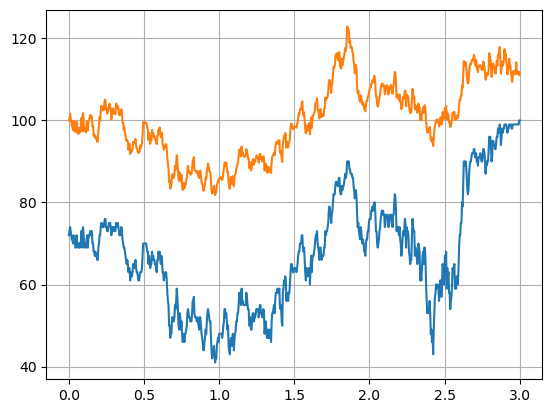

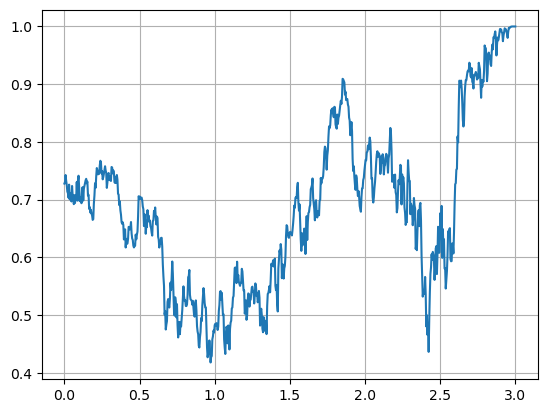

In [61]:
plt.plot(df["Time"], - df["Options_Short"])
plt.plot(df["Time"], df["Asset_Price"])
plt.grid(True)
plt.show()

plt.plot(df["Time"], df["Delta"])
plt.grid(True)
plt.show()